# Graduation Outcomes for NYC Public School 
* Group member: Qing Dou Ziqi Huang
* Repository: https://github.com/qdou14/GraduationOutcomes

## Abstract

This study focuses on analyzing the impact of school characteristics and student social backgrounds on graduation outcomes in New York City public schools, begins by importing a comprehensive dataset covering various aspects of over 1,800 schools, including demographics, student enrollment, and academic performance metrics. An initial exploratory data analysis (EDA) is conducted to gain insights into the data's nature and distribution.

Following the EDA, the data is prepared. This stage involves handling missing values and outliers to ensure data quality and reliability. A significant part of this preparation includes feature engineering, where new, relevant features are created to deepen the analysis. This step is crucial for revealing more nuanced correlations and patterns within the data.

The prepared data then undergoes a more refined EDA process, focusing on these newly engineered features and their relationships to graduation outcomes. The investigative analysis explores the intricate interplay between school environments and student demographics, using statistical methods to draw out key findings and results.

dataset1: 2006 - 2012 School Demographics and Accountability Snapshot
Annual school accounts of NYC public school student populations served by grade, special programs, ethnicity, gender and Title I funded programs. 

dataset2: 2005-2010 Graduation Outcomes - School Level


## 1 Introduction

The New York City Department of Education is the largest public school system in the United States, encompassing over 1,800 schools and serving a diverse student body. Understanding the factors that influence graduation rates in such a vast and varied system is crucial. These graduation outcomes are more than just academic scores; they mirror the city's social and economic realities and significantly affect students' future opportunities.

Our project focuses on a key question: What is the combined effect of school characteristics and student social backgrounds on graduation outcomes in New York City's public schools ? and how ?

This research is important for a city as diverse as New York, where the educational environment varies greatly. We analyze a comprehensive dataset that includes  student enrollment data, the number of English Language Learners, and important academic indicators like graduation rates and Regents exam scores. Our goal is to uncover trends and disparities in the educational achievements of these schools.

### 1.1 Data Source
To conduct our study, we will utilize two datasets from the New York City Department of Education available publicly on the NYC Open Data platform. 

#### 1.1.1 Dataset1 ——2006-2012 School Demographics and Accountability Snapshot

The first dataset is about annual school accounts of NYC public school student populations served by grade, special programs, ethnicity, gender and Title I funded programs. 

Data source: [NYC Open Data (School Demographics)](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) 
* Data Dictionary 

| Column Name        | Column Description                                        |
|--------------------|-----------------------------------------------------------|
| DBN                | District, Borough and school number                       |
| Name               | School name                                               |
| Schoolyear         | School Year                                               |
| fl_percent         | Free lunch                                                |
| total_enrollment   | Total enrollment count of students for all grades         |
| ell_percent        | Percentage of English language learner's students         |
| sped_percent       | Percentage of special education students                  |
| asian_per          | Percentage of Asian students                              |
| black_per          | Percentage of Black students                              |
| hispanic_per       | Percentage of Hispanic students                           |
| white_per          | Percentage of White students                              |
| male_per           | Percentage of male students                               |
| female_per         | Percentage of female students                             |

Load the data to show the first rows:

In [1]:
from src.graduation_outcomes.data_preparation import APIClient
api_url = "https://data.cityofnewyork.us/resource/ihfw-zy9j.json"
api = APIClient(api_url)
df1 = api.fetch_all_data()
df1_filtered = api.filter_data(['20082009'])
df1_filtered.head()

,dbn,name,schoolyear,fl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,252,19,24.6,6.3,29.8,59.1,2.8,59.1,40.9
10,01M019,P.S. 019 ASHER LEVY,20082009,61.5,325,8.3,21.5,12,25.5,45.8,9.8,48,52
17,01M020,PS 020 ANNA SILVER,20082009,92.5,593,21.4,17,23.6,9.3,63.4,1.5,48.2,51.8
24,01M034,PS 034 FRANKLIN D ROOSEVELT,20082009,77,424,9,23.1,6.6,20.5,69.6,2.1,50.5,49.5
32,01M063,PS 063 WILLIAM MCKINLEY,20082009,63.9,199,4,27.6,9.5,17.1,65.3,7,63.8,36.2


#### 1.1.2 Dataset 2 -2005-2010 Graduation Outcomes

The first dataset is about graduation Outcomes - Cohorts of 2001 through 2006 (Classes of 2005 through 2010).
Data source: (https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) 

| Column Name                     | Column Description                                        |
|---------------------------------|----------------------------------------------------------|
| Demographic                     | Student's demographic information                        |
| DBN                             | District, Borough and school number                       |
| School Name                     | Name of school                                            |
| Cohort                          | School year test was administered                         |
| Total Cohort                    | Total number of students who took test                    |
| Total Grads - % of Cohort       | Reflects the total percentage of students who graduated   |
| Total Regents - % of Cohort     | Percentages of total Cohorts who passed regents exam      |
| Advanced Regents - % of Cohort  | Percentages of total Cohorts who passed advanced regents  |
| Regents w/o Advanced - % of Cohort | Percentages of total Cohorts who passed non-advanced regents exams |
| Local - % of Cohort             | Percentage of total Cohorts who received a local diploma  |
| Still Enrolled - % of Cohort    | Percentage of total Cohorts students still enrolled       |
| Dropped Out - % of Cohort       | Percentage of total Cohorts students who dropped out      |

Load the data to show the first rows:

In [2]:
from src.graduation_outcomes.data_preparation import DataProcess
csv_url = "https://raw.githubusercontent.com/qdou14/GraduationOutcomes/main/dataset/2005-2010_Graduation_Outcomes_-_School_Level_20231209.csv"
processor = DataProcess(csv_url)
filtered_df2 = processor.filter_data(['2004'], 'Total Cohort')
filtered_df2.head()

,Demographic,DBN,School Name,Cohort,Total Grads - % of cohort,Total Regents - % of cohort,Advanced Regents - % of cohort,Regents w/o Advanced - % of cohort,Local - % of cohort,Still Enrolled - % of cohort,Dropped Out - % of cohort
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,67.3,30.9,0.0,30.9,36.4,27.3,5.5
8,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2004,67.0,32.1,5.4,26.8,34.8,29.5,3.6
15,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2004,72.5,60.0,0.0,60.0,12.5,16.3,11.3
22,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2004,44.6,20.0,4.6,15.4,24.6,41.5,12.3
29,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2004,48.5,37.0,30.0,7.0,11.5,39.0,12.5


Next, through EDA of the two datasets, we will integrate these tables for further analysis to address subsequent questions.

## 3 Research Approach

Data Preparation:
The initial step involved meticulous data preparation. We began by addressing missing values in our dataset, opting to replace them with the median values of their respective columns. This approach was chosen to maintain the integrity of the data while dealing with gaps in information.

To address the issue of outliers, which can skew analysis and lead to misleading conclusions, we applied winsorization, specifically with parameters set to limits=[0.5, 0.5]. This method effectively limits extreme values, ensuring a more robust and reliable dataset for analysis.Specifically, setting the limits to 0.05 at both ends of our data means that the lowest 5% and the highest 5% of the values in each column are replaced with values closer to the median

Feature Engineering:
A significant part of our data preparation involved creating new features that could offer deeper insights. One such feature is the ‘graduation_quality_index’. This was calculated as the average of two existing variables: 'Total Grads - % of Cohort' and 'Advanced Regents - % of Cohort'. This new metric provides a more nuanced view of graduation outcomes by combining overall graduation rates with the success rates in advanced academic assessments.

Investigative Analysis:

Data Management Strategy:
Throughout our project, we employed a rigorous data management strategy, ensuring data integrity, consistency, and relevance. This involved regular data audits, careful documentation of data transformations, and adherence to data privacy and ethical considerations.

## 4 Exploratory Data Analysis

First initialize the class EDAPerformer.

In [3]:
from src.graduation_outcomes.graduation_eda import EDAPerformer

### 4.1 Dataset1 overview

In [4]:
df1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 3 to 10071
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dbn               1441 non-null   object
 1   name              1441 non-null   object
 2   schoolyear        1441 non-null   object
 3   fl_percent        1441 non-null   object
 4   total_enrollment  1441 non-null   object
 5   ell_percent       1431 non-null   object
 6   sped_percent      1441 non-null   object
 7   asian_per         1441 non-null   object
 8   black_per         1441 non-null   object
 9   hispanic_per      1441 non-null   object
 10  white_per         1441 non-null   object
 11  male_per          1441 non-null   object
 12  female_per        1441 non-null   object
dtypes: object(13)
memory usage: 157.6+ KB


We find that all dtypes are objects and we need to convert them to numeric.

In [5]:
converted_df = api.convert_columns_to_numeric(df1_filtered,[
    'fl_percent', 'total_enrollment', 'ell_percent',
    'sped_percent', 'asian_per', 'black_per',
    'hispanic_per', 'white_per', 'male_per', 'female_per'
])
converted_df.head()

,dbn,name,schoolyear,fl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,252,19.0,24.6,6.3,29.8,59.1,2.8,59.1,40.9
10,01M019,P.S. 019 ASHER LEVY,20082009,61.5,325,8.3,21.5,12.0,25.5,45.8,9.8,48.0,52.0
17,01M020,PS 020 ANNA SILVER,20082009,92.5,593,21.4,17.0,23.6,9.3,63.4,1.5,48.2,51.8
24,01M034,PS 034 FRANKLIN D ROOSEVELT,20082009,77.0,424,9.0,23.1,6.6,20.5,69.6,2.1,50.5,49.5
32,01M063,PS 063 WILLIAM MCKINLEY,20082009,63.9,199,4.0,27.6,9.5,17.1,65.3,7.0,63.8,36.2


In [6]:
converted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 3 to 10071
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dbn               1441 non-null   object 
 1   name              1441 non-null   object 
 2   schoolyear        1441 non-null   object 
 3   fl_percent        1441 non-null   float64
 4   total_enrollment  1441 non-null   int64  
 5   ell_percent       1431 non-null   float64
 6   sped_percent      1441 non-null   float64
 7   asian_per         1441 non-null   float64
 8   black_per         1441 non-null   float64
 9   hispanic_per      1441 non-null   float64
 10  white_per         1441 non-null   float64
 11  male_per          1441 non-null   float64
 12  female_per        1441 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 157.6+ KB


In [7]:
converted_df.describe()

,fl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per
count,1441.000000,1441.000000,1431.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,66.999778,666.968078,12.583159,15.269119,10.885566,34.944969,41.073352,12.047883,50.401596,49.598681
std,21.241949,556.828562,13.775012,6.674803,16.503973,28.524360,25.735072,19.157948,8.148114,8.147872
min,5.200000,48.000000,0.000000,0.000000,0.000000,0.000000,1.600000,0.000000,0.000000,0.000000
25%,58.400000,366.000000,3.700000,11.200000,1.100000,10.500000,17.200000,0.900000,48.300000,46.800000
50%,71.100000,524.000000,8.500000,14.900000,3.200000,27.900000,39.200000,2.300000,50.900000,49.100000
75%,83.000000,794.000000,17.050000,18.900000,13.400000,55.000000,62.700000,14.300000,53.200000,51.700000
max,100.000000,4662.000000,100.000000,46.300000,93.200000,96.800000,100.000000,92.800000,100.000000,100.000000


We found 10 null values in ell_percent, so we analyzed ell_percent in detail.

#### 4.1.1 ell_percent analysis
ell_percent is percentage of english language learner's students per school

In [8]:
eda1 = EDAPerformer(converted_df)
eda1.describe_stats('ell_percent')

count    1431.000000
mean       12.583159
std        13.775012
min         0.000000
25%         3.700000
50%         8.500000
75%        17.050000
max       100.000000
Name: ell_percent, dtype: float64

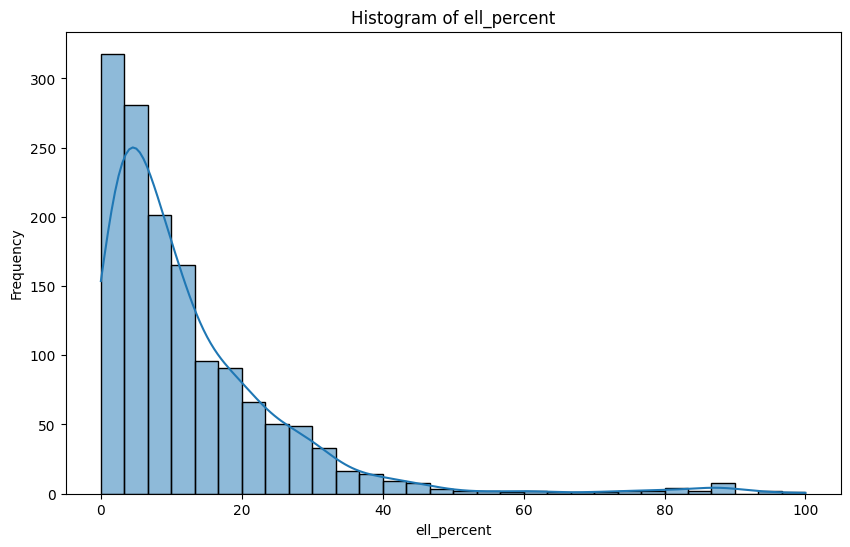

In [9]:
eda1.plot_histogram('ell_percent')

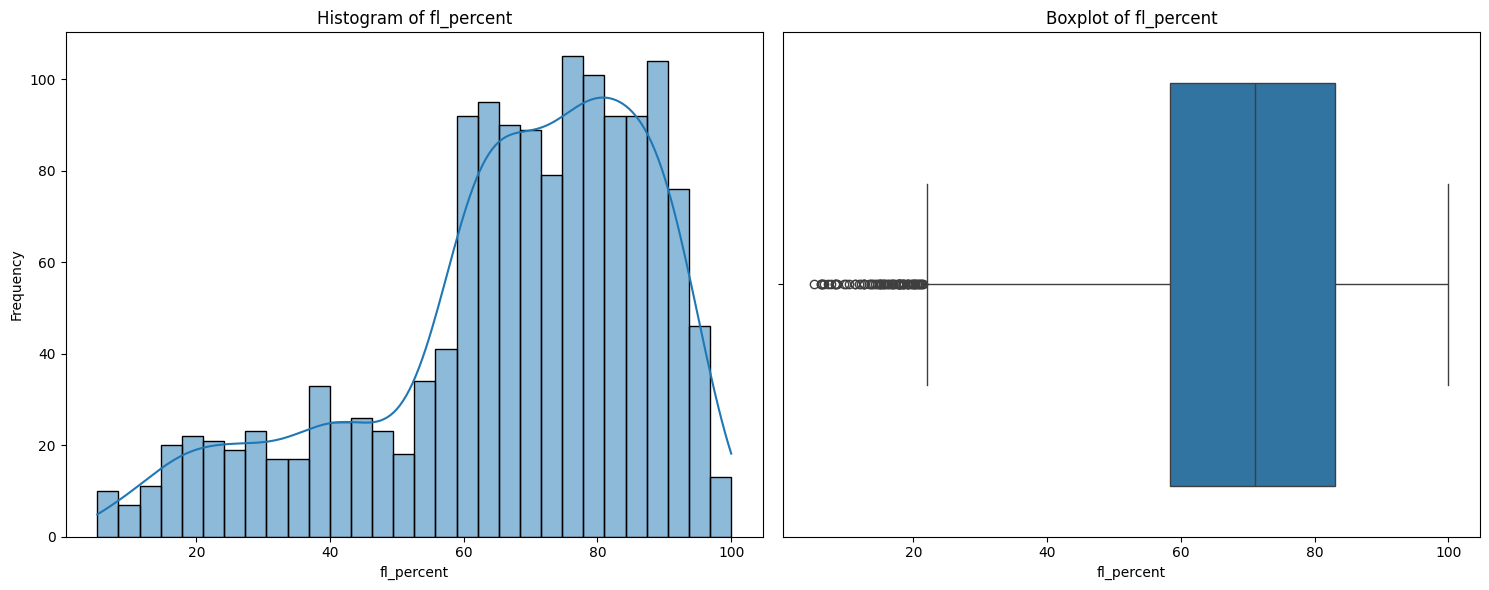

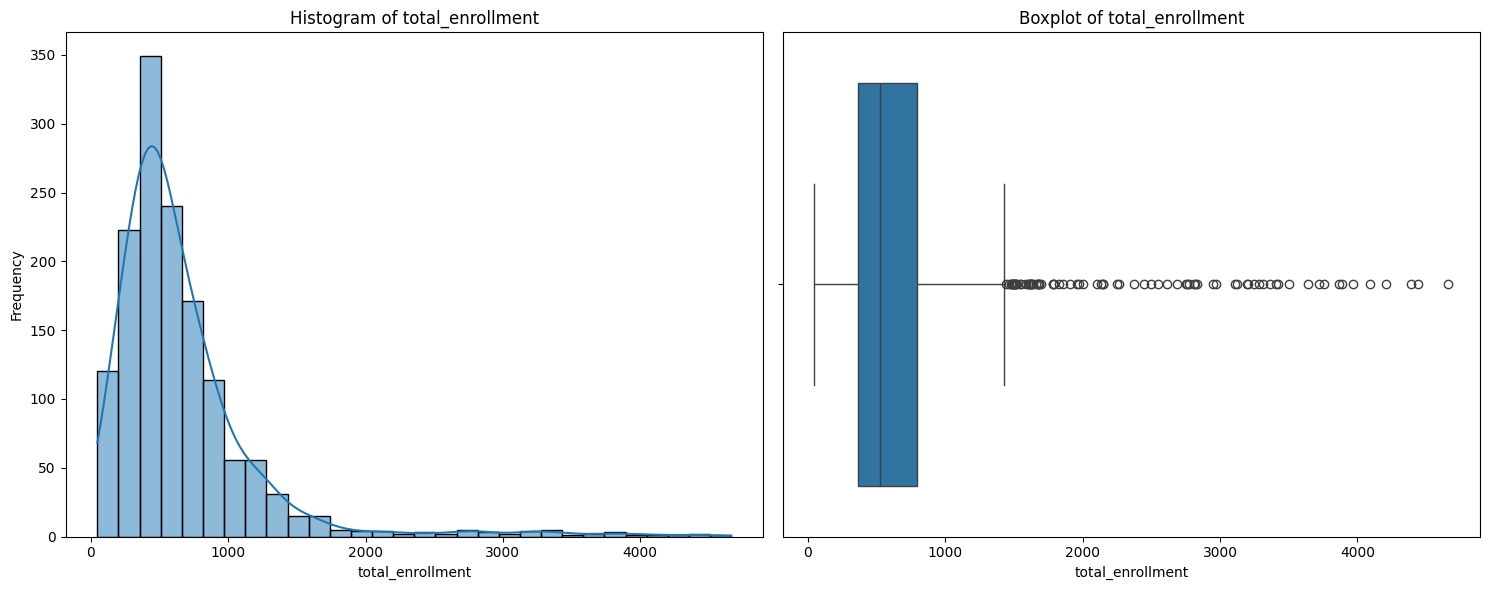

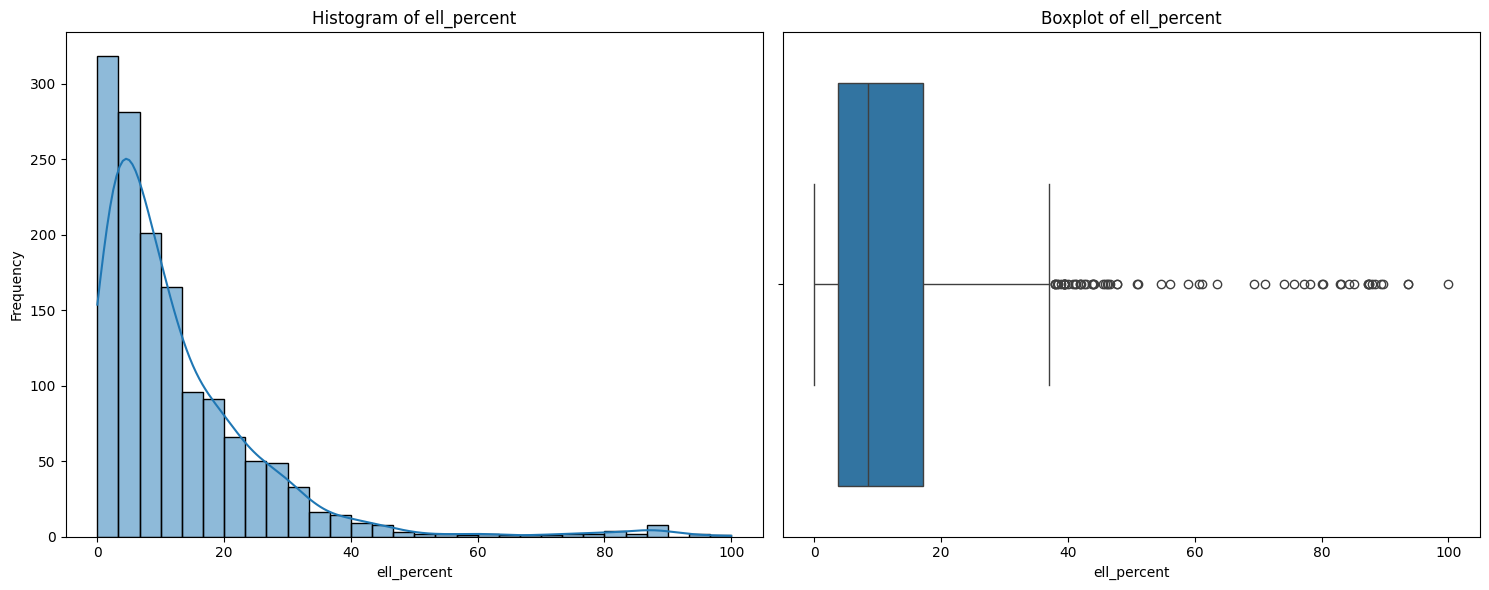

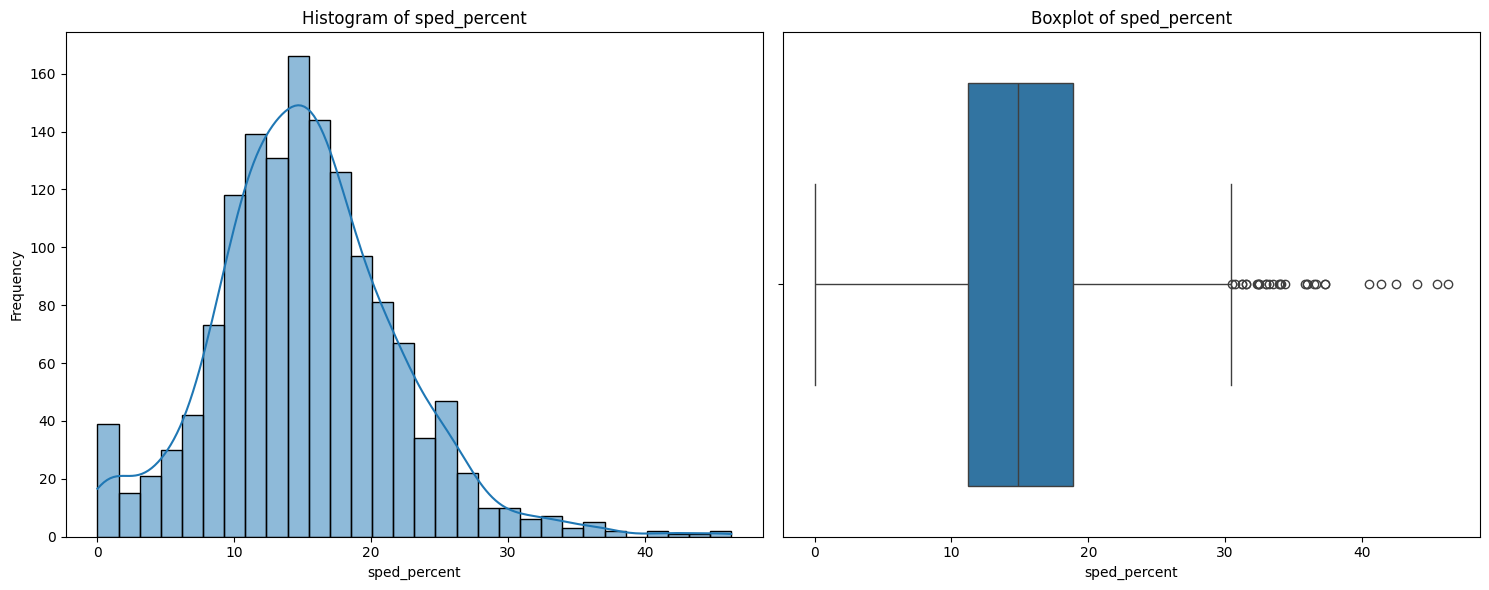

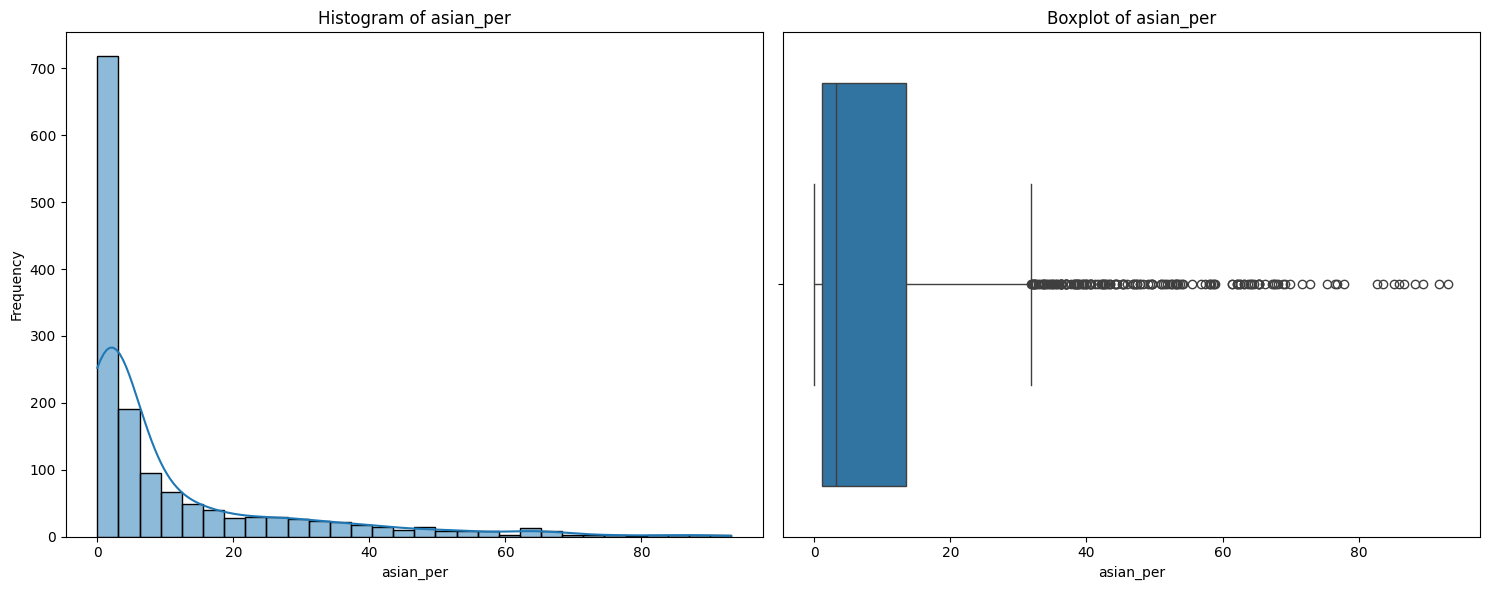

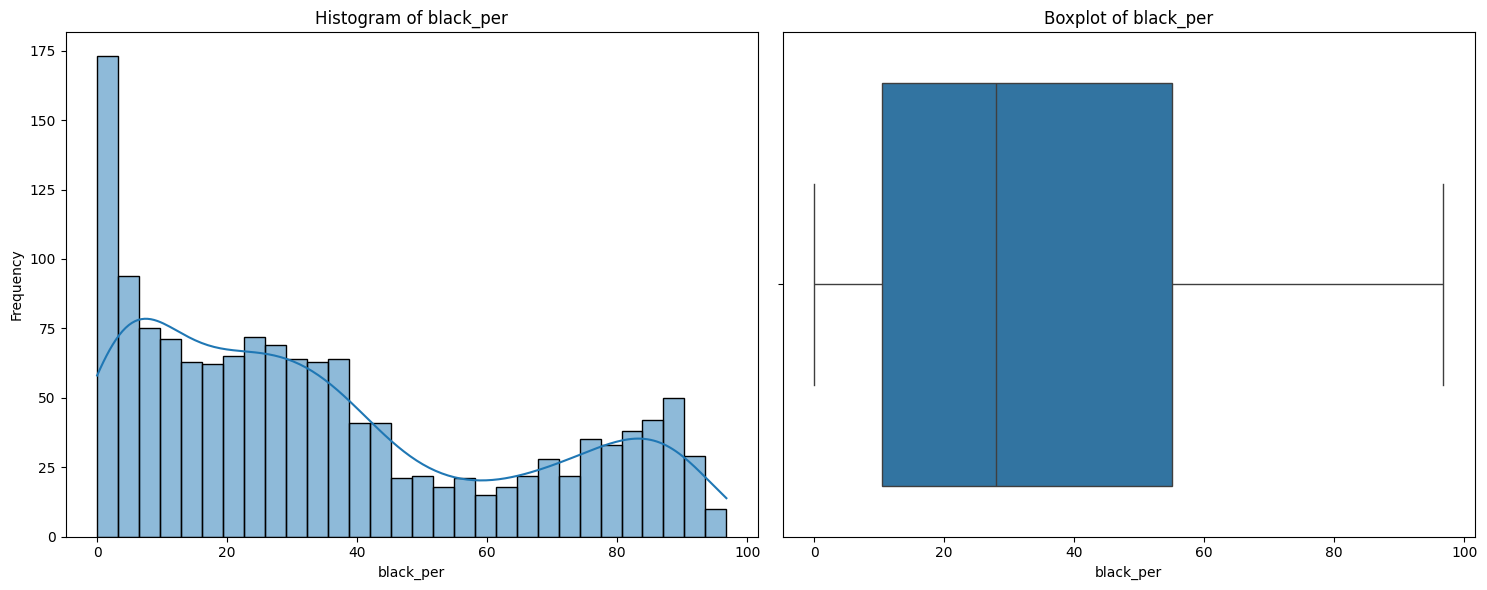

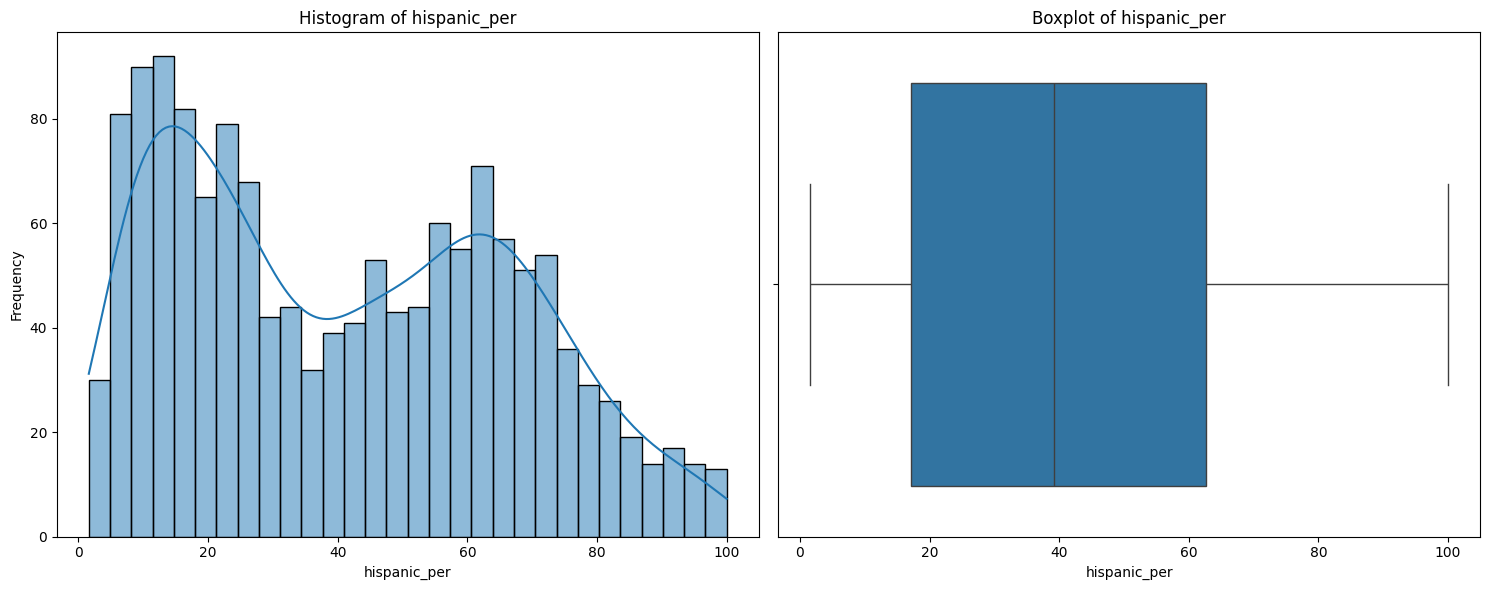

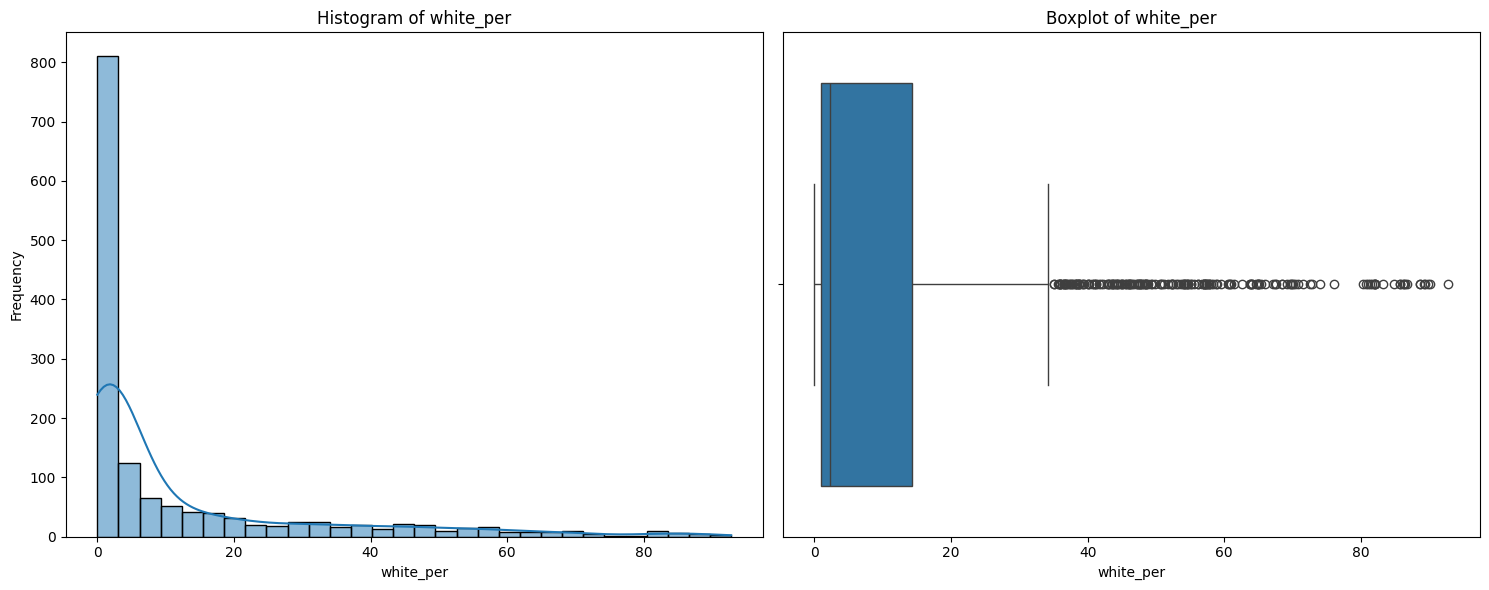

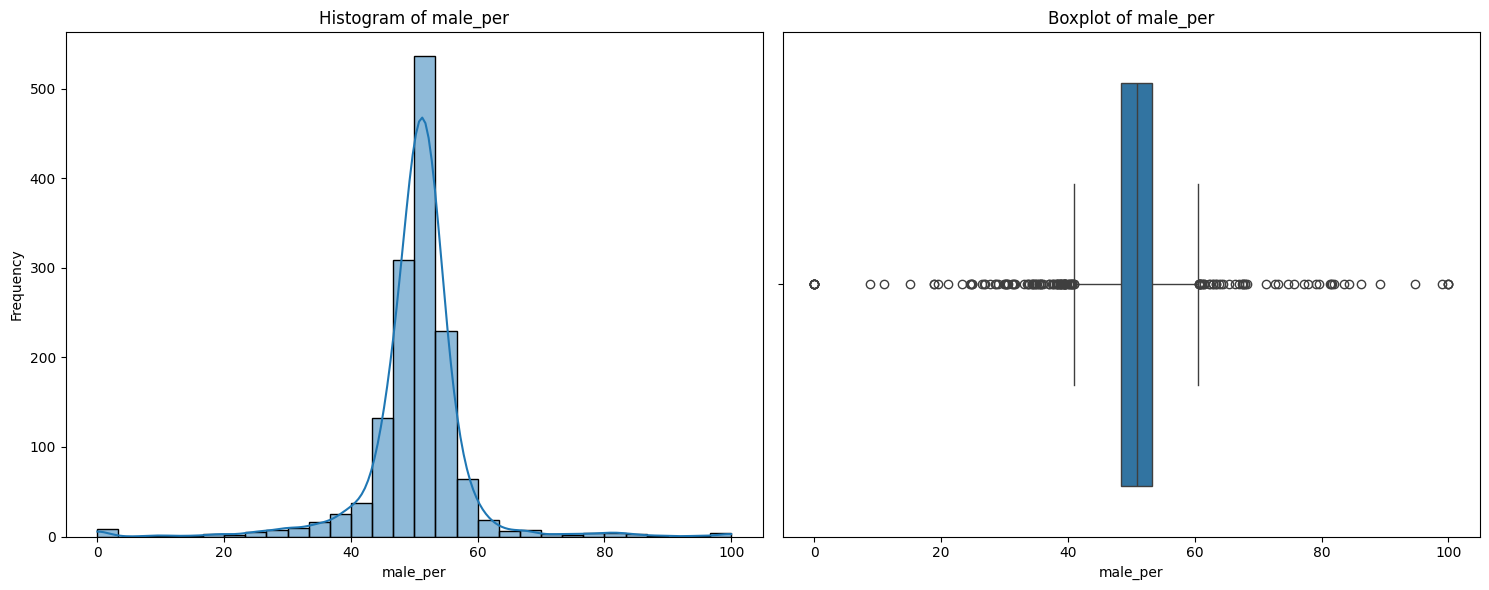

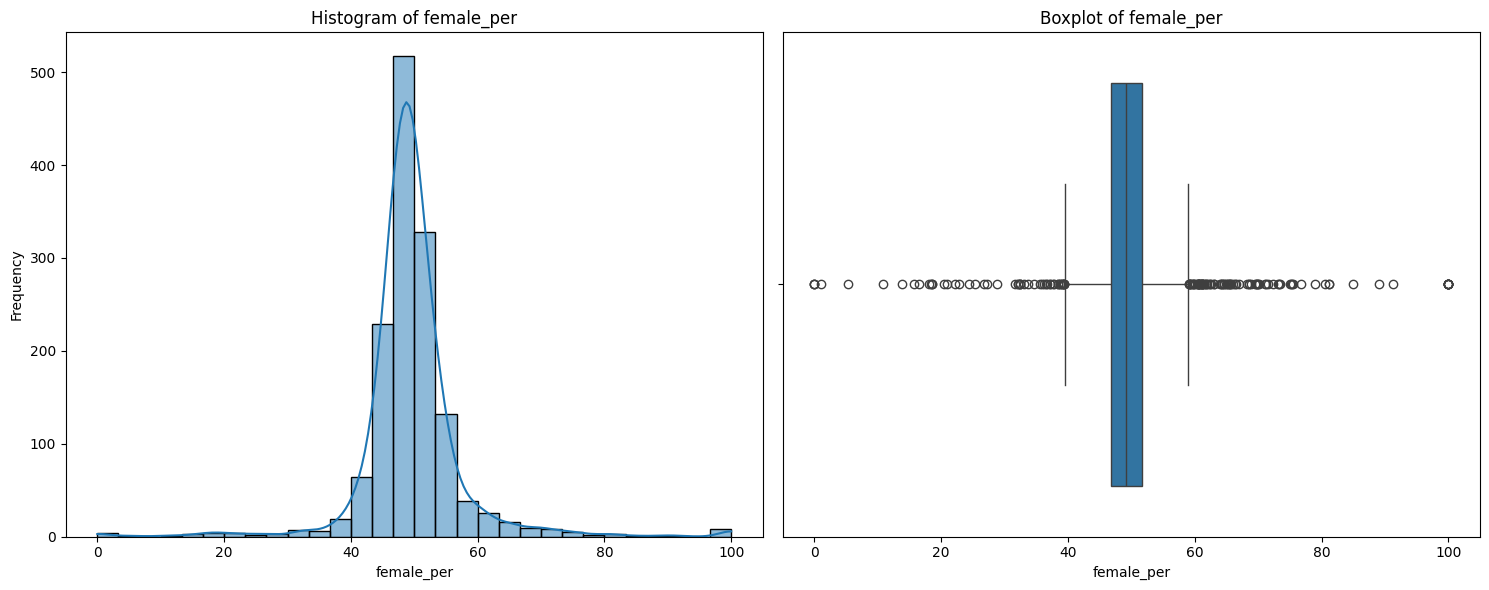

In [10]:
eda1.plot_all_columns()

#### 4.1.2 total_enrollment
Total enrollment count of students for all grades by DBN/School per fiscal school year.

In [11]:
eda1.describe_stats(['total_enrollment',])

,total_enrollment
count,1441.000000
mean,666.968078
std,556.828562
min,48.000000
25%,366.000000
50%,524.000000
75%,794.000000
max,4662.000000


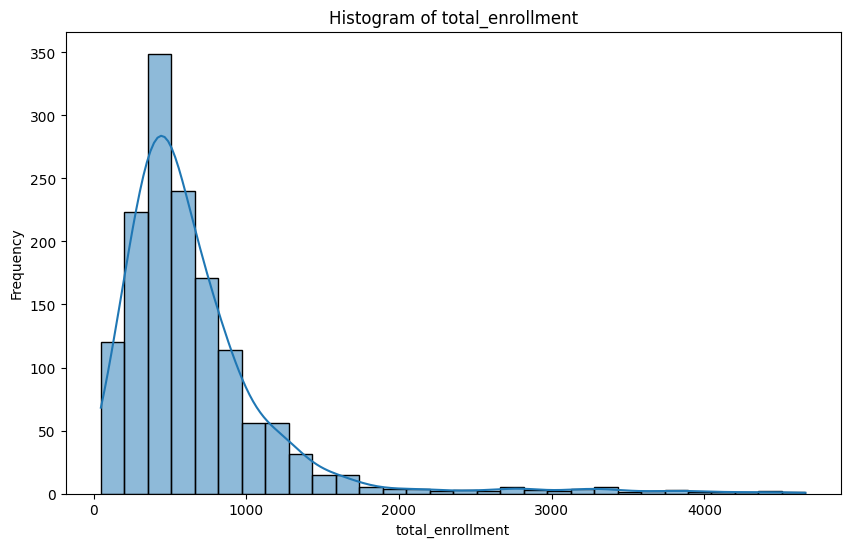

In [12]:
eda1.plot_histogram('total_enrollment')

### 4.2 Dataset2 overview

In [13]:
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 1 to 2507
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Demographic                         367 non-null    object 
 1   DBN                                 367 non-null    object 
 2   School Name                         367 non-null    object 
 3   Cohort                              367 non-null    object 
 4   Total Grads - % of cohort           326 non-null    float64
 5   Total Regents - % of cohort         326 non-null    float64
 6   Advanced Regents - % of cohort      326 non-null    float64
 7   Regents w/o Advanced - % of cohort  326 non-null    float64
 8   Local - % of cohort                 326 non-null    float64
 9   Still Enrolled - % of cohort        326 non-null    float64
 10  Dropped Out - % of cohort           326 non-null    float64
dtypes: float64(7), object(4)
memory usage: 34.4+

We found 41 null values in the percentage columns, so we conducted a detailed analysis of each one.

#### 4.2.1 Total Grads - % of cohort
Reflects the total percentage of students whom graduated

In [14]:
eda2 = EDAPerformer(filtered_df2)
eda2.describe_stats('Total Grads - % of cohort')

count    326.000000
mean      61.263804
std       21.828070
min        1.200000
25%       48.325000
50%       62.850000
75%       77.650000
max      100.000000
Name: Total Grads - % of cohort, dtype: float64

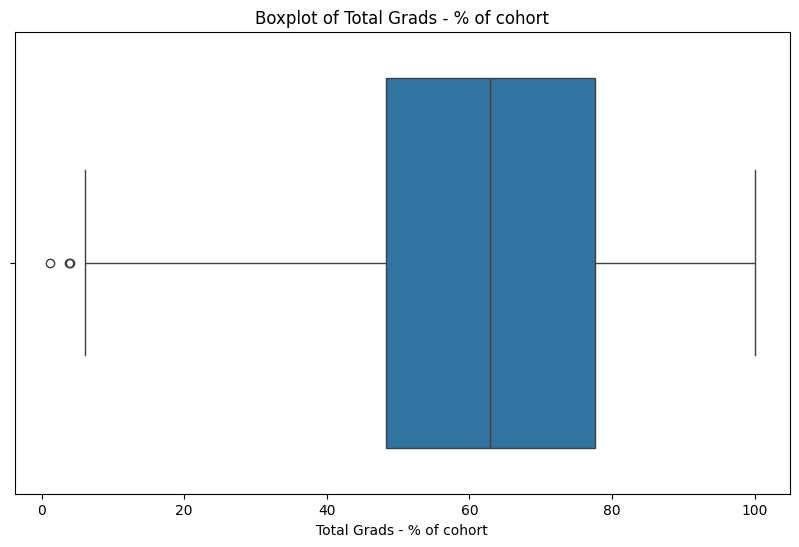

In [15]:
eda2.plot_boxplot('Total Grads - % of cohort')

#### 4.2.1 Dropped Out - % of cohort
Reflects the total percentage of students whom graduated

In [16]:
eda2.describe_stats('Dropped Out - % of cohort')

count    326.000000
mean      10.105828
std        7.986334
min        0.000000
25%        3.925000
50%        8.400000
75%       14.875000
max       41.400000
Name: Dropped Out - % of cohort, dtype: float64

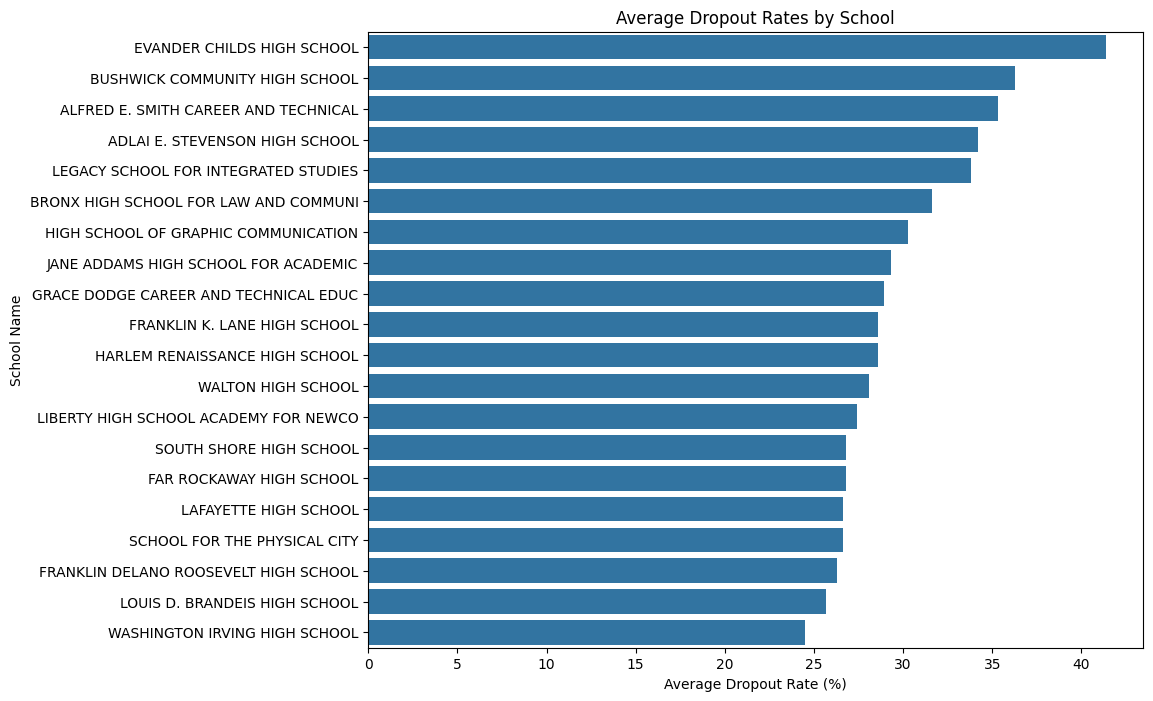

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

school_dropout_rates = filtered_df2.groupby('School Name')['Dropped Out - % of cohort'].mean().sort_values(ascending=False)

top_schools = school_dropout_rates.head(20) 

plt.figure(figsize=(10, 8))
sns.barplot(x=top_schools.values, y=top_schools.index)

plt.title('Average Dropout Rates by School')
plt.xlabel('Average Dropout Rate (%)')
plt.ylabel('School Name')

plt.show()

## 5 Data Preparation
Describe + show the steps you have taken to address the data integrity + usability issues you identified in your EDA, including any feature engineering techniques you have applied to the data set. This section should include any Python code used for Data Preparation.

对于两个数据库中有相同DBN的数据，我们按照入学年份进行组合

In [21]:
merged_df = processor.process_and_merge_data(converted_df, filtered_df2)
merged_df.to_csv('merged_data.csv', index=False)
merged_df.head()

,dbn,name,schoolyear,fl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Grads - % of cohort,Total Regents - % of cohort,Advanced Regents - % of cohort,Regents w/o Advanced - % of cohort,Local - % of cohort,Still Enrolled - % of cohort,Dropped Out - % of cohort
13,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,20082009,95.3,470,10.6,25.1,10.0,29.4,56.2,3.0,56.2,43.8,67.3,30.9,0.0,30.9,36.4,27.3,5.5
22,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,20082009,60.9,586,6.7,21.7,19.3,23.5,47.8,4.3,52.4,47.6,67.0,32.1,5.4,26.8,34.8,29.5,3.6
23,01M450,EAST SIDE COMMUNITY HIGH SCHOOL,20082009,67.7,546,4.9,26.7,6.2,26.6,59.7,6.0,52.2,47.8,72.5,60.0,0.0,60.0,12.5,16.3,11.3
24,01M509,MARTA VALLE SECONDARY SCHOOL,20082009,81.5,441,12.9,18.4,11.8,17.7,68.7,1.8,52.2,47.8,44.6,20.0,4.6,15.4,24.6,41.5,12.3
25,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,20082009,77.0,514,87.5,0.6,93.2,3.3,3.1,0.4,52.9,47.1,48.5,37.0,30.0,7.0,11.5,39.0,12.5


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 13 to 1440
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   dbn                                 321 non-null    object 
 1   name                                321 non-null    object 
 2   schoolyear                          321 non-null    object 
 3   fl_percent                          321 non-null    float64
 4   total_enrollment                    321 non-null    int64  
 5   ell_percent                         316 non-null    float64
 6   sped_percent                        321 non-null    float64
 7   asian_per                           321 non-null    float64
 8   black_per                           321 non-null    float64
 9   hispanic_per                        321 non-null    float64
 10  white_per                           321 non-null    float64
 11  male_per                            321 non

In [23]:
df = processor.replace_ell_percent_nulls_with_median(merged_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 13 to 1440
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   dbn                                 321 non-null    object 
 1   name                                321 non-null    object 
 2   schoolyear                          321 non-null    object 
 3   fl_percent                          321 non-null    float64
 4   total_enrollment                    321 non-null    int64  
 5   ell_percent                         321 non-null    float64
 6   sped_percent                        321 non-null    float64
 7   asian_per                           321 non-null    float64
 8   black_per                           321 non-null    float64
 9   hispanic_per                        321 non-null    float64
 10  white_per                           321 non-null    float64
 11  male_per                            321 non

In [24]:
df.head()

,dbn,name,schoolyear,fl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,Total Grads - % of cohort,Total Regents - % of cohort,Advanced Regents - % of cohort,Regents w/o Advanced - % of cohort,Local - % of cohort,Still Enrolled - % of cohort,Dropped Out - % of cohort
13,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,20082009,95.3,470,10.6,25.1,10.0,29.4,56.2,3.0,56.2,43.8,67.3,30.9,0.0,30.9,36.4,27.3,5.5
22,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,20082009,60.9,586,6.7,21.7,19.3,23.5,47.8,4.3,52.4,47.6,67.0,32.1,5.4,26.8,34.8,29.5,3.6
23,01M450,EAST SIDE COMMUNITY HIGH SCHOOL,20082009,67.7,546,4.9,26.7,6.2,26.6,59.7,6.0,52.2,47.8,72.5,60.0,0.0,60.0,12.5,16.3,11.3
24,01M509,MARTA VALLE SECONDARY SCHOOL,20082009,81.5,441,12.9,18.4,11.8,17.7,68.7,1.8,52.2,47.8,44.6,20.0,4.6,15.4,24.6,41.5,12.3
25,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,20082009,77.0,514,87.5,0.6,93.2,3.3,3.1,0.4,52.9,47.1,48.5,37.0,30.0,7.0,11.5,39.0,12.5


## 6 Prepped Data Review
Explain + present your post-Data Prep EDA analysis. This section should include any Python code used for re-running your EDA on the variables adjusted during your Data Preparation work.

In [28]:
eda = EDAPerformer(df)

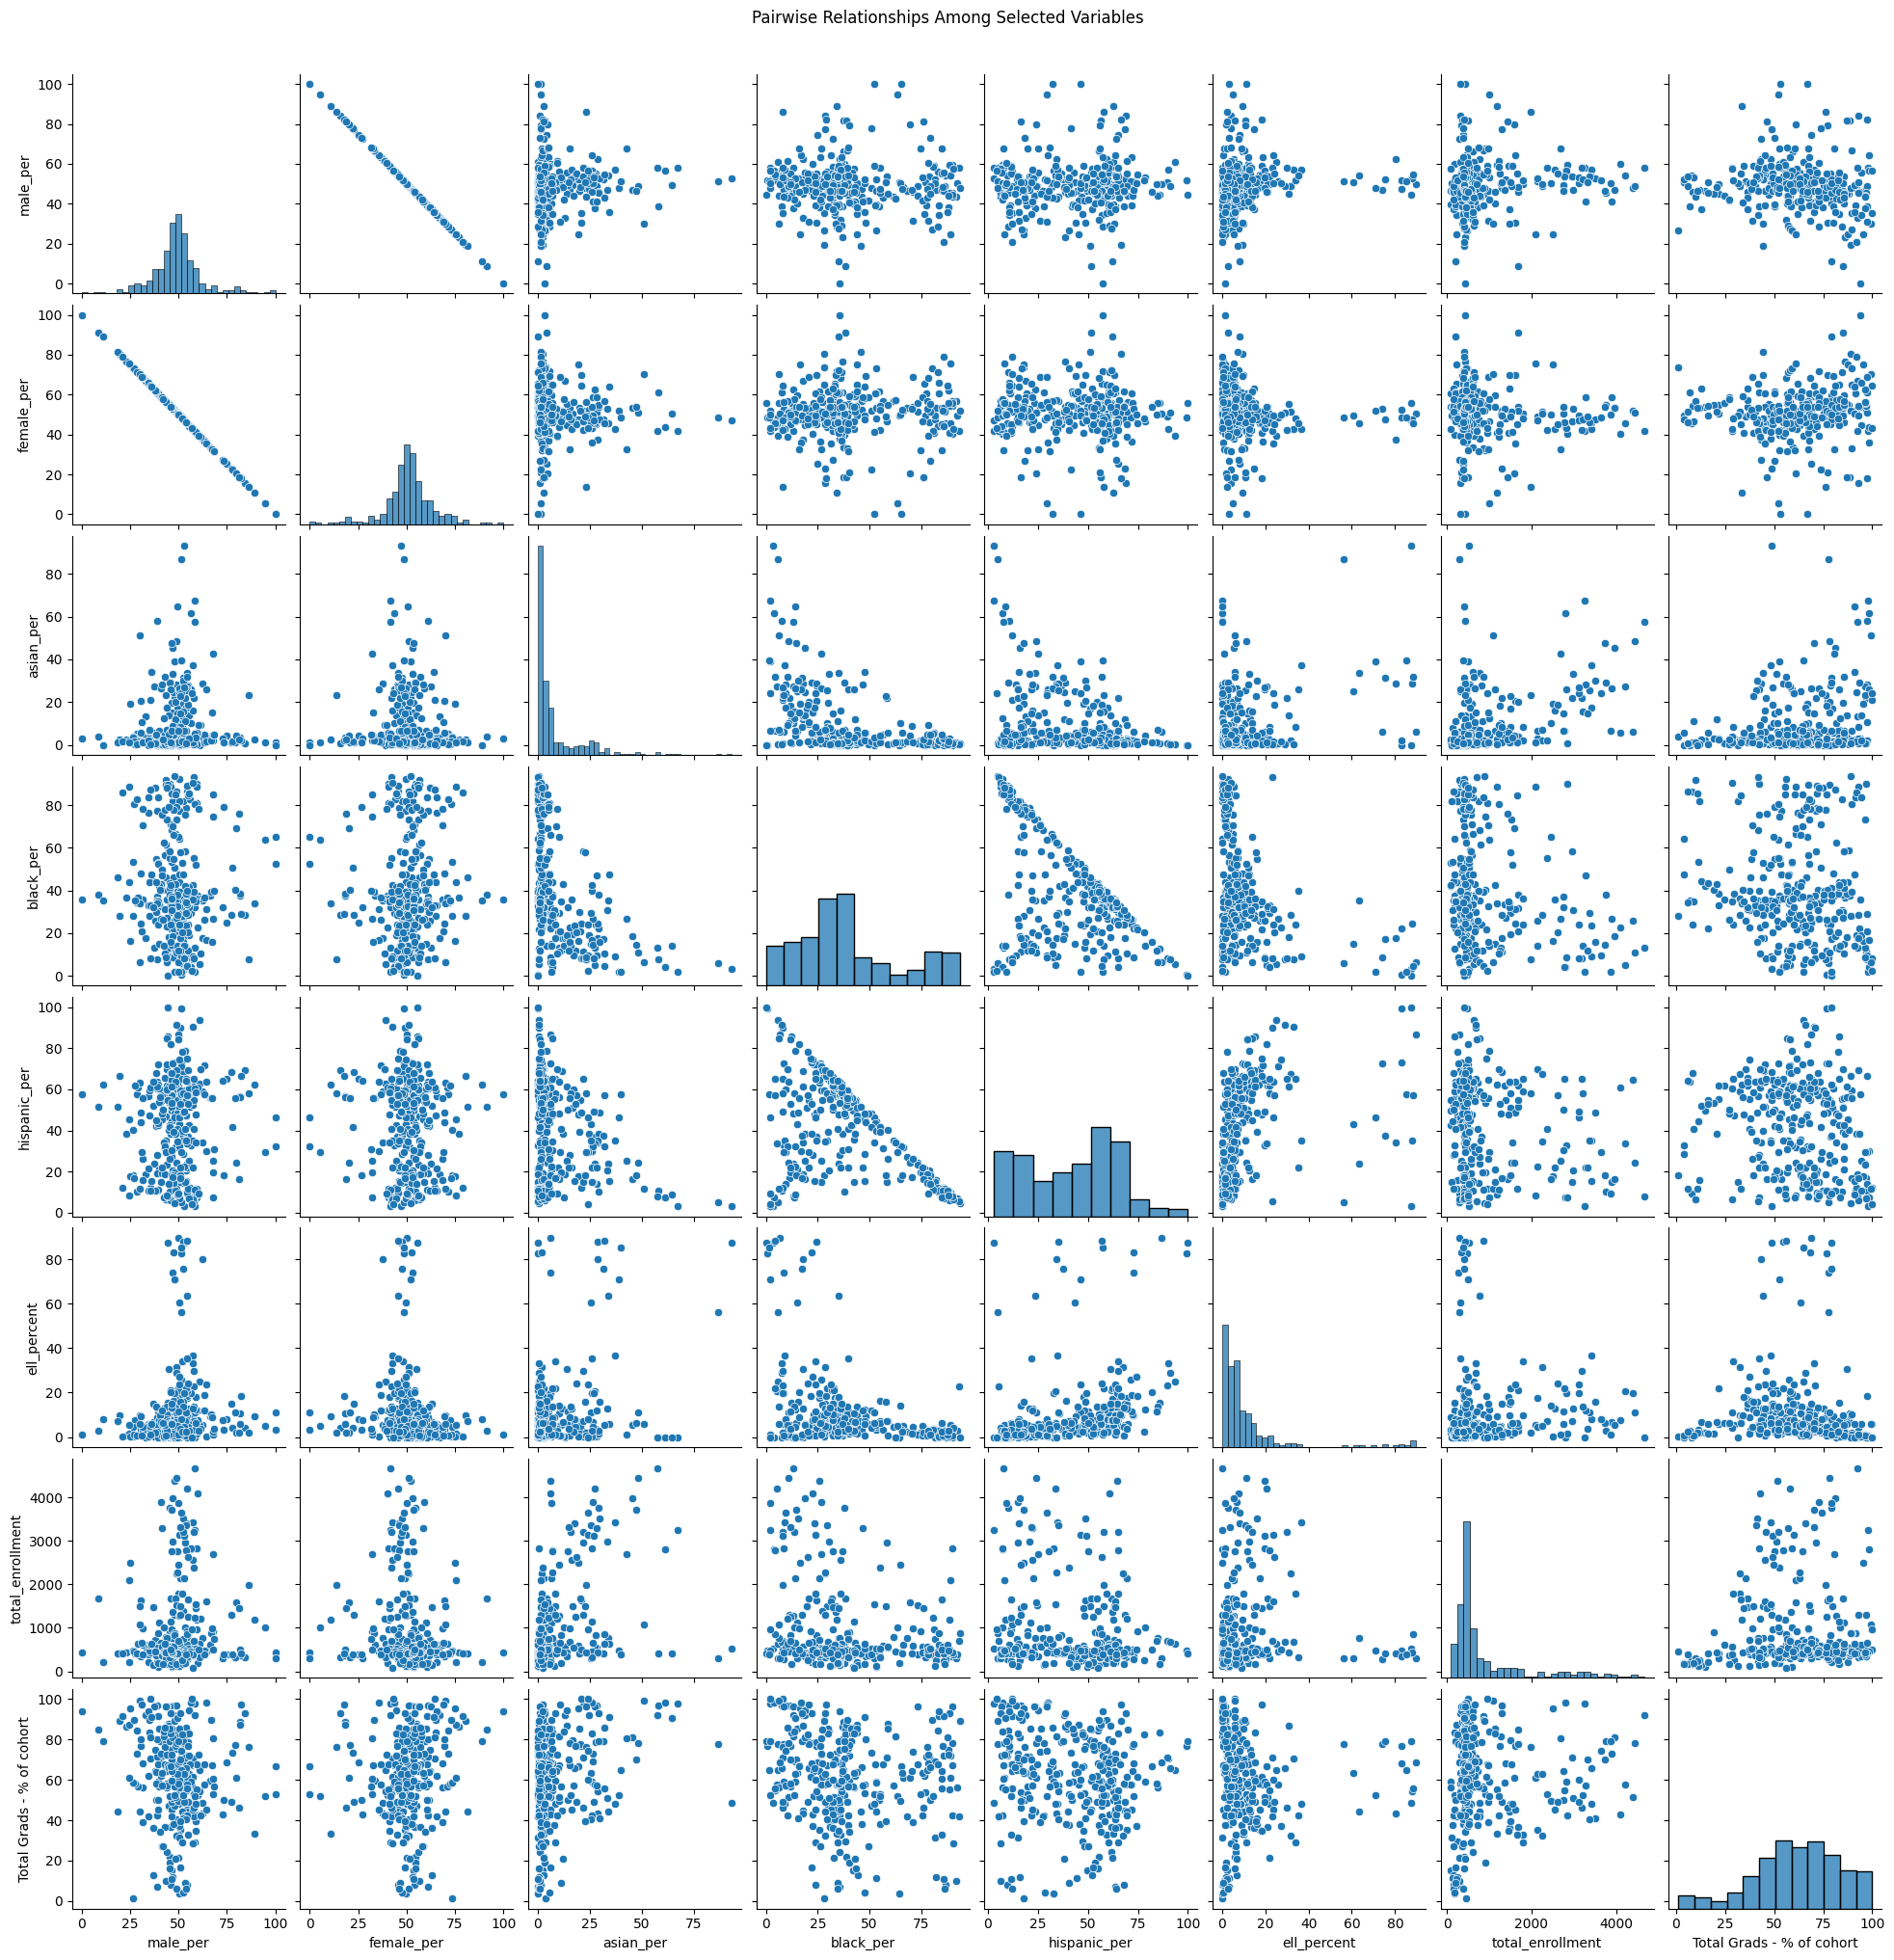

In [29]:
eda.plot_pairplot(['male_per', 'female_per', 'asian_per', 'black_per','hispanic_per','ell_percent','total_enrollment','Total Grads - % of cohort'])

d:\final project\GraduationOutcomes\src\graduation_outcomes\graduation_eda.py:67: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(self.df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


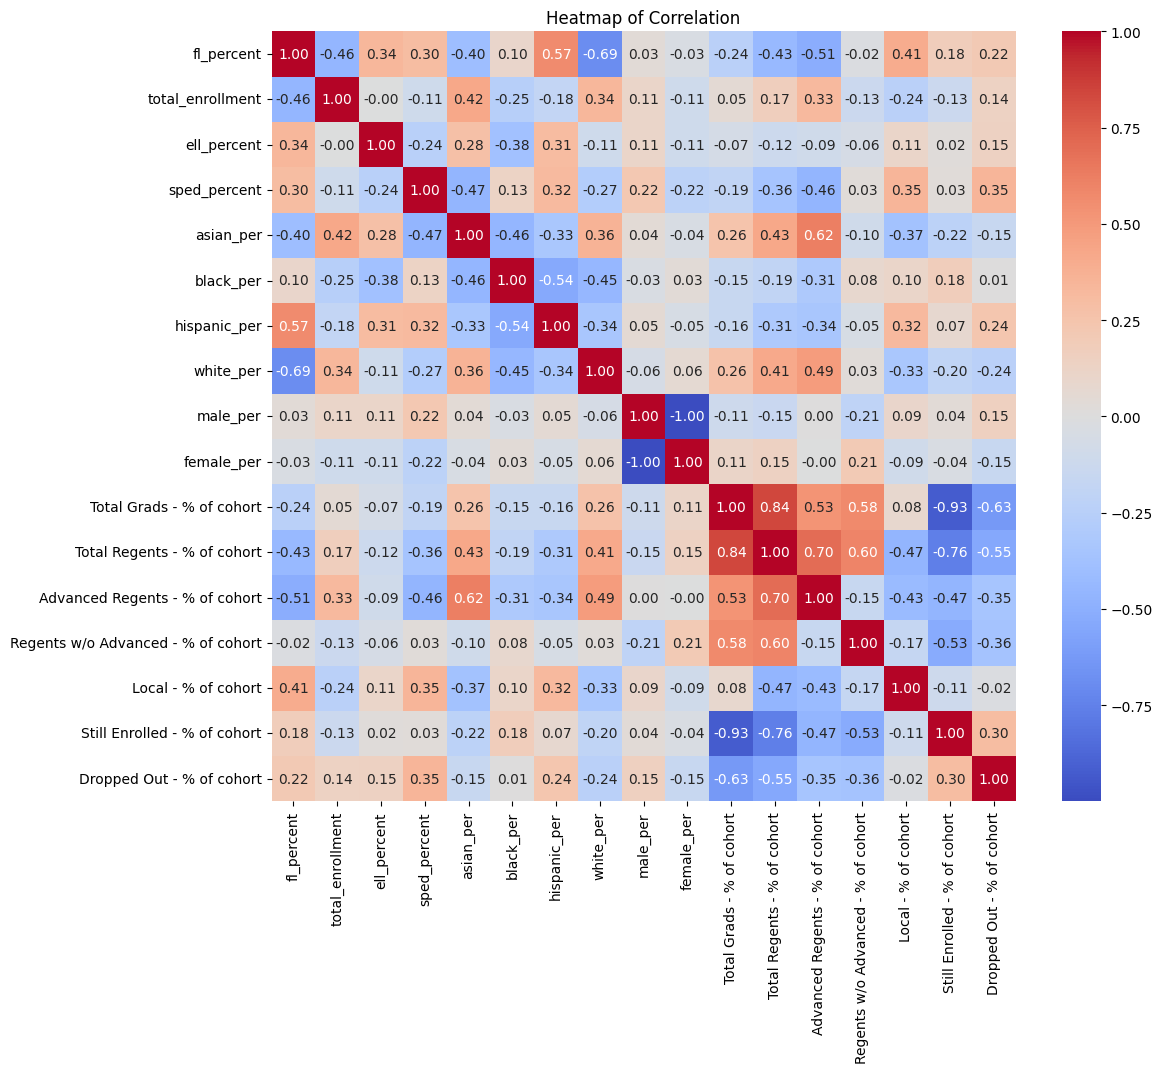

In [30]:
eda.plot_heatmap()

## 7 Investigative Analysis & Results
Explain + present your investigative analysis work, including any Python code used as part of that process. Provide and explain your answers to your research questions.

### 1 association between students' economic background and educational outcomes

* Explore the relationship between family economic status (such as free or reduced-price lunch percentage) and students' graduation rates and exam pass rates.
* Relevant columns: fl_percent, Total Grads - % of Cohort, Total Regents

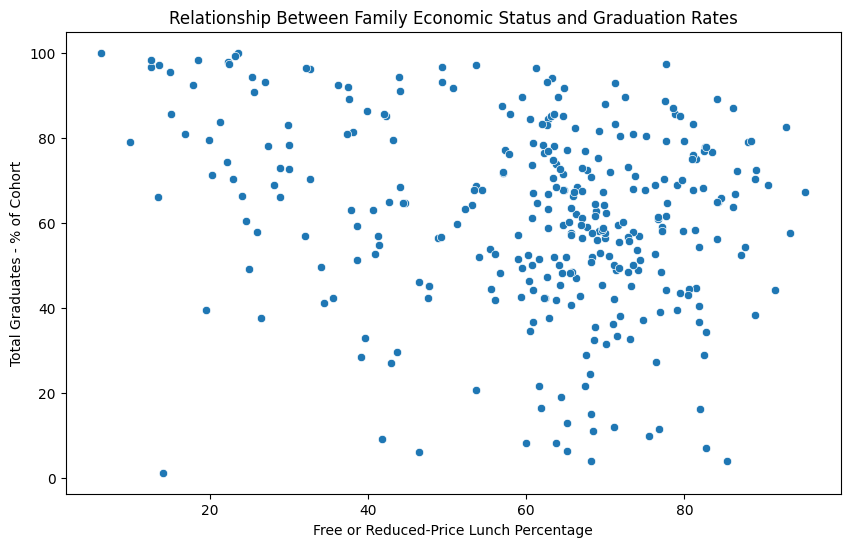

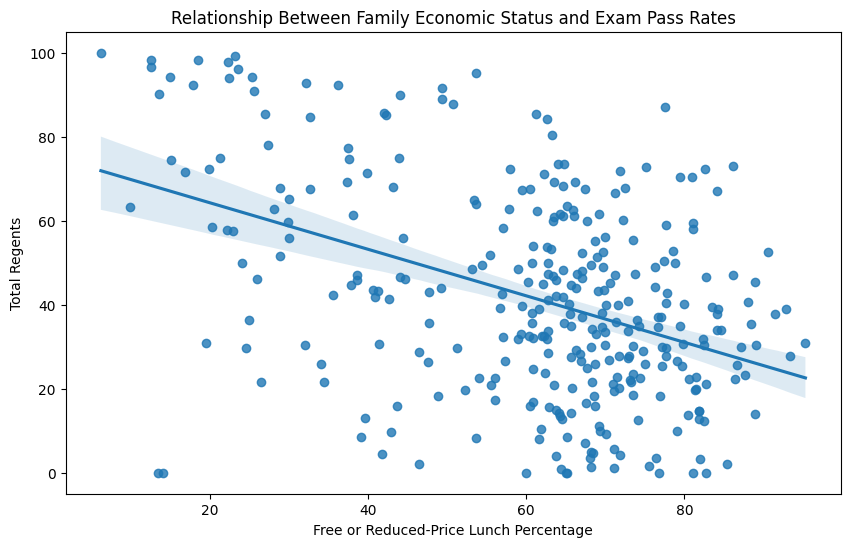

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fl_percent', y='Total Grads - % of cohort', data=df)
plt.title('Relationship Between Family Economic Status and Graduation Rates')
plt.xlabel('Free or Reduced-Price Lunch Percentage')
plt.ylabel('Total Graduates - % of Cohort')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='fl_percent', y='Total Regents - % of cohort', data=df)
plt.title('Relationship Between Family Economic Status and Exam Pass Rates')
plt.xlabel('Free or Reduced-Price Lunch Percentage')
plt.ylabel('Total Regents')
plt.show()

### 2 association between school racial diversity background and educational outcomes
* Analyze the educational outcomes of students in schools with different racial.
* Relevant columns: asian_num, black_num, hispanic_num, white_num, Total Grads - % of Cohort, Total Regents

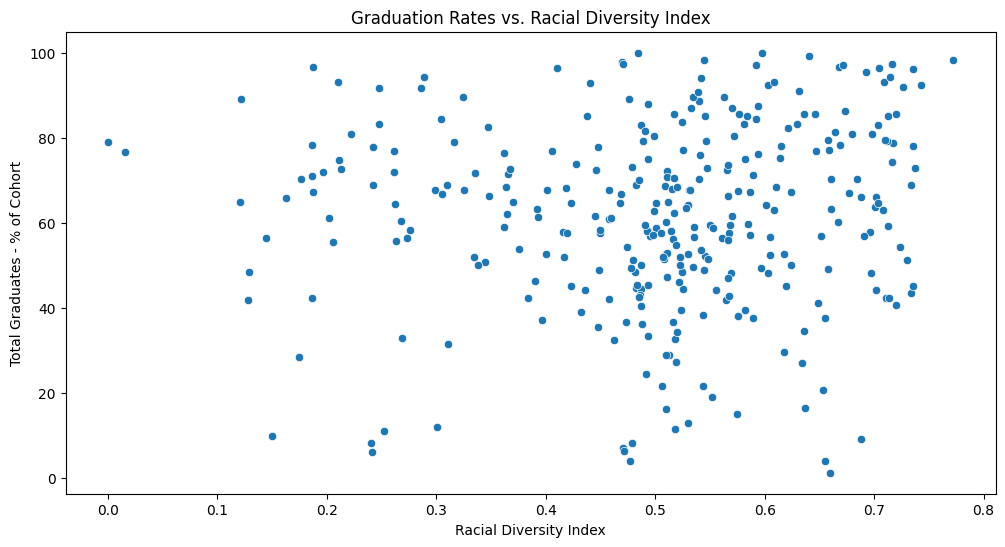

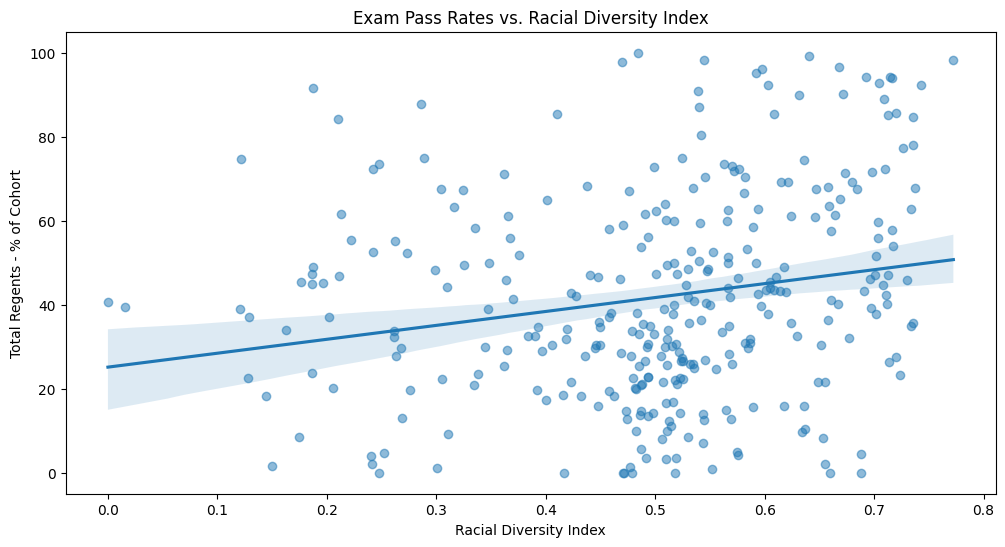

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['HHI'] = (df['asian_per'] / 100) ** 2 + (df['black_per'] / 100) ** 2 + (df['hispanic_per'] / 100) ** 2 + (df['white_per'] / 100) ** 2

df['Diversity Index'] = 1 - df['HHI']

df['Diversity Index'] = 1 - df['HHI']

df['Total Grads - % of cohort'] = pd.to_numeric(df['Total Grads - % of cohort'], errors='coerce')
df['Total Regents - % of cohort'] = pd.to_numeric(df['Total Regents - % of cohort'], errors='coerce')

df.dropna(subset=['Total Grads - % of cohort', 'Total Regents - % of cohort', 'Diversity Index'], inplace=True)

plt.figure(figsize=(12, 6))

sns.scatterplot(x='Diversity Index', y='Total Grads - % of cohort', data=df)
plt.title('Graduation Rates vs. Racial Diversity Index')
plt.xlabel('Racial Diversity Index')
plt.ylabel('Total Graduates - % of Cohort')
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(x='Diversity Index', y='Total Regents - % of cohort', data=df, scatter_kws={'alpha':0.5})
plt.title('Exam Pass Rates vs. Racial Diversity Index')
plt.xlabel('Racial Diversity Index')
plt.ylabel('Total Regents - % of Cohort')
plt.show()

### 3 association between school special education needs and educational outcomes
* Analyze the educational outcomes with special education needs (such as English language learners and special education students).
* Relevant columns: ell_percent, sped_percent, Total Grads - % of Cohort, Total Regents - % of Cohort

### 4 association between gender ratio needs and educational outcomes
* Analyze the educational outcomes with the ratio of male and female students.
* Relevant columns:  male_num, female_num, Total Grads - % of Cohort, Total Regents 

### 6 Destination after graduation
* Relevant columns:  Still Enrolled , Local , Dropped Out 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

categories = ['Still Enrolled - % of cohort', 'Local - % of cohort', 'Dropped Out - % of cohort']
N = len(categories)

selected_schools = df.head(5)

fig = plt.figure(figsize=(12, 8))

for i, row in selected_schools.iterrows():
    values = row[categories].tolist()
    values += values[:1] 
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1] 
    
    ax = plt.subplot(2, 3, i+1, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values)
    ax.fill(angles, values, alpha=0.1)
    plt.title(row['School Name'], size=11, color='blue', y=1.1)
    
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = ['female_per', 'asian_per', 'white_per','total_enrollment']
target = 'Total Grads - % of cohort'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 476.01324653567826
R^2 Score: 0.06342282295699608


### 7 association between different Dropout Rates and school
* Relevant columns:  DBN, School Name, Dropped Out - % of Cohort

## 8 Conclusions
Summarize your work and clearly state the conclusions of your research. Were you able to answer the research questions you originally posed in your Proposal? Comment on any potential future extensions of the work you’ve completed for the Project.